In [1]:
import os

os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
os.environ["TORCH_USE_CUDA_DSA"] = "1"

import torch
print(torch.cuda.is_available())

True


In [2]:
import logging
import sys

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

console_handler = logging.StreamHandler(sys.stdout)
console_handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)
logger.addHandler(console_handler)
logger.propagate = False


logger.info("Logger is set up and ready to use.")

2025-08-13 15:56:43,235 - __main__ - INFO - Logger is set up and ready to use.


In [3]:
%%time
from transformers import pipeline
import torch

model_id = "openai/gpt-oss-120b"

logger.info(f"Loading model {model_id}...")
pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype="auto",
    device_map="auto",
)
logger.info("Model loaded successfully.")


2025-08-13 15:56:47,537 - __main__ - INFO - Loading model openai/gpt-oss-120b...


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model-00014-of-00014.safetensors:   0%|          | 0.00/4.12G [00:00<?, ?B/s]

Fetching 40 files:   0%|          | 0/40 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/15 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/165 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/27.9M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/98.0 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

Device set to use cuda:0


2025-08-13 16:00:08,986 - __main__ - INFO - Model loaded successfully.
CPU times: user 1min 27s, sys: 1min 45s, total: 3min 13s
Wall time: 3min 25s


In [4]:
extracted_text = ""

with open("extracted_text.txt", "r") as file:
    extracted_text = file.read()

logger.info(f"Extracted text: {extracted_text[:100]}")

2025-08-13 16:00:14,923 - __main__ - INFO - Extracted text: 
132 John L
Dicotyledones

ACERACEAE

Acer campestre L.
1 folder. Acer campestre [TA]
Acer pseudopla


In [5]:
%%time
logger.info("Starting text generation...")
message_1 = ("From the following OCR'd text, extract all instances of family names and species names under each family. Only extract species names that are a start of a record."
            "\nOutput the results in a JSON format."
            "\nIdentify any page headers, footers, and page numbers.\n"
            f"Do not clean. \n\n Extracted text: {extracted_text[:2000]}"
            )
messages = [
    {"role": "user", "content": message_1},
]

max_tokens = 4096
logger.info("Generating text...")
logger.info(f"Max tokens set to {max_tokens}.")

outputs = pipe(
    messages,
    max_new_tokens=max_tokens,
)
logger.info("Text generation completed.")
logger.info("Generated text:")
logger.info(outputs[0]["generated_text"][-1]["content"])


2025-08-13 16:00:16,719 - __main__ - INFO - Starting text generation...
2025-08-13 16:00:16,720 - __main__ - INFO - Generating text...
2025-08-13 16:00:16,721 - __main__ - INFO - Max tokens set to 4096.
2025-08-13 16:02:09,353 - __main__ - INFO - Text generation completed.
2025-08-13 16:02:09,354 - __main__ - INFO - Generated text:
2025-08-13 16:02:09,355 - __main__ - INFO - analysisWe need to parse the OCR text, extract all instances of family names and species names under each family. Only extract species names that are a start of a record. Likely a record starts with a species name line like "Acer campestre L." etc. We must output JSON format.

Also identify any page headers, footers, and page numbers. We need to list them as separate entries.

We should not clean text, so keep as is.

We need to produce JSON with structure maybe:

{
 "families": [
   {
     "family": "ACERACEAE",
     "species": [
       "Acer campestre L.",
       "Acer pseudoplatanus L."
     ]
   },
  ...
 ],
 "

### gpt-oss-20B model analysis

| max_tokens | GPU usage | review | Inference Time estimate |
|------------|-----------|--------|-------------------------|
| 256        | ~8000 MB  | Output is in markdown, have not mentioned a format in the text| ~10s |
| 1024       | ~8086 MB  | Output is similar to last output but with more explanation given the expanded token usage | ~40s|
| 2048       | ~8086 MB  | Output is similar to last output but with more explanation given the expanded token usage | ~40s|
| 4096       | ~8086 MB  | Output is similar to last output but with more explanation given the expanded token usage | ~40s|

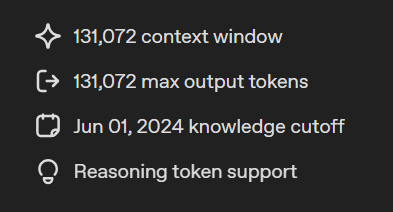
